In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ladwa\Desktop\New folder (6)\weather_data_100rows.csv")

In [3]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition'],
      dtype='object')

In [4]:
df.head()

,Date,City,Temperature_C,Humidity,Wind_Speed_kmph,Rainfall_mm,Weather_Condition
0,2024-07-01,Mumbai,24.5,47,11.1,8.2,Rainy
1,2024-07-02,Chennai,25.6,57,5.8,18.6,Rainy
2,2024-07-03,Chennai,27.6,71,22.5,35.9,Sunny
3,2024-07-04,Mumbai,37.7,40,22.5,12.4,Foggy
4,2024-07-05,Bangalore,25.8,54,7.4,0.0,Rainy


In [5]:
"""📊 Basic Analysis
How many unique cities are in the dataset?

What is the overall average temperature?

What is the average humidity across all cities?

Which city has the highest average temperature?

Which city has the lowest total rainfall?"""

'📊 Basic Analysis\nHow many unique cities are in the dataset?\n\nWhat is the overall average temperature?\n\nWhat is the average humidity across all cities?\n\nWhich city has the highest average temperature?\n\nWhich city has the lowest total rainfall?'

In [6]:
#How many unique cities are in the dataset
df["City"].value_counts()

City
Mumbai       23
Bangalore    20
Delhi        20
Kolkata      19
Chennai      18
Name: count, dtype: int64

In [7]:
#What is the overall average temperature?
df["Temperature_C"].mean()

33.17699999999999

In [8]:
#What is the average humidity across all cities Humidity
df.groupby("City")["Humidity"].mean()

City
Bangalore    64.350000
Chennai      61.555556
Delhi        60.500000
Kolkata      64.315789
Mumbai       56.478261
Name: Humidity, dtype: float64

In [9]:
#Which city has the highest average temperature?  #Temperature_C
df.groupby("City")["Temperature_C"].mean().sort_values(ascending=False).head(1)

City
Mumbai    34.365217
Name: Temperature_C, dtype: float64

In [10]:
#Which city has the lowest total rainfall  #Rainfall_mm
df.groupby("City")["Rainfall_mm"].sum().sort_values().head(1)

City
Delhi    261.7
Name: Rainfall_mm, dtype: float64

In [11]:
"""🗓️ Time-Based Questions
How does temperature vary over time for each city?

On which date was the highest temperature recorded?

Which city experienced the most rainfall on a single day?

What is the daily average temperature across all cities?

How many days were recorded for each city?

🌧️ Rain & Wind Insights
What is the average wind speed by city?

How many days had rainfall greater than 50mm?

Which city had the most rainy days?

What is the total rainfall per city?

Is there any correlation between wind speed and rainfall?
"""

'🗓️ Time-Based Questions\nHow does temperature vary over time for each city?\n\nOn which date was the highest temperature recorded?\n\nWhich city experienced the most rainfall on a single day?\n\nWhat is the daily average temperature across all cities?\n\nHow many days were recorded for each city?\n\n🌧️ Rain & Wind Insights\nWhat is the average wind speed by city?\n\nHow many days had rainfall greater than 50mm?\n\nWhich city had the most rainy days?\n\nWhat is the total rainfall per city?\n\nIs there any correlation between wind speed and rainfall?\n'

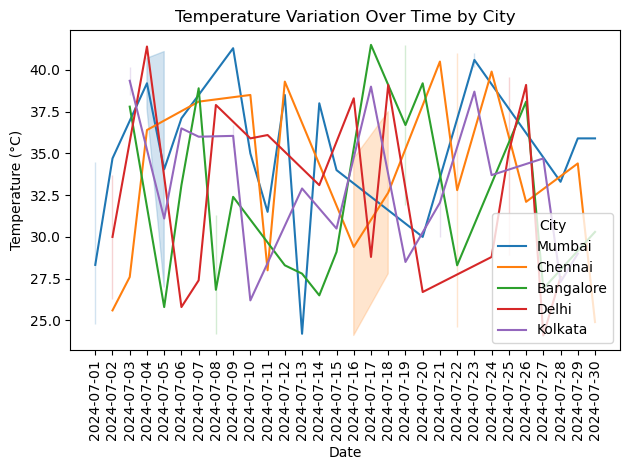

In [12]:
#How does temperature vary over time for each city
sns.lineplot(data=df,x="Date",y="Temperature_C",hue="City")
plt.title("Temperature Variation Over Time by City")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [13]:
df["Date"].duplicated().sum()

70

In [14]:
#On which date was the highest temperature recorded?
df.groupby("Date")["Temperature_C"].sum().sort_values(ascending=False).head(2)

Date
2024-07-04    156.2
2024-07-09    145.8
Name: Temperature_C, dtype: float64

In [15]:
df.loc[df["Temperature_C"].idxmax()]

Date                 2024-07-17
City                  Bangalore
Temperature_C              41.5
Humidity                     85
Wind_Speed_kmph            28.6
Rainfall_mm                 0.0
Weather_Condition         Sunny
Name: 16, dtype: object

In [16]:
#Which city experienced the most rainfall on a single day
df.loc[df["Rainfall_mm"].idxmax()]

Date                 2024-07-03
City                    Kolkata
Temperature_C              38.5
Humidity                     84
Wind_Speed_kmph            18.8
Rainfall_mm                79.9
Weather_Condition        Stormy
Name: 32, dtype: object

In [17]:
df.groupby("City")["Rainfall_mm"].sum().sort_values(ascending=False).head(1)

City
Mumbai    569.1
Name: Rainfall_mm, dtype: float64

In [18]:
#What is the daily average temperature across all cities?
df.groupby("Date")["Temperature_C"].mean()

Date
2024-07-01    28.325000
2024-07-02    30.075000
2024-07-03    36.025000
2024-07-04    39.050000
2024-07-05    31.250000
2024-07-06    33.125000
2024-07-07    35.100000
2024-07-08    29.600000
2024-07-09    36.450000
2024-07-10    33.900000
2024-07-11    31.866667
2024-07-12    35.366667
2024-07-13    28.300000
2024-07-14    32.533333
2024-07-15    31.200000
2024-07-16    32.366667
2024-07-17    36.433333
2024-07-18    34.800000
2024-07-19    33.966667
2024-07-20    31.966667
2024-07-21    34.866667
2024-07-22    31.300000
2024-07-23    39.966667
2024-07-24    34.133333
2024-07-25    35.100000
2024-07-26    36.433333
2024-07-27    28.566667
2024-07-28    29.400000
2024-07-29    33.100000
2024-07-30    30.366667
Name: Temperature_C, dtype: float64

In [19]:
#How many days were recorded for each city
df.groupby("City")["Date"].count()

City
Bangalore    20
Chennai      18
Delhi        20
Kolkata      19
Mumbai       23
Name: Date, dtype: int64

In [20]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition'],
      dtype='object')

In [21]:
#What is the average wind speed by city?
df.groupby("City")["Wind_Speed_kmph"].mean()

City
Bangalore    17.620000
Chennai      19.344444
Delhi        19.150000
Kolkata      15.984211
Mumbai       17.882609
Name: Wind_Speed_kmph, dtype: float64

In [22]:
#How many days had rainfall greater than 50mm
max_rain=df[df["Rainfall_mm"]>50]
max_rain.count()

Date                 18
City                 18
Temperature_C        18
Humidity             18
Wind_Speed_kmph      18
Rainfall_mm          18
Weather_Condition    18
dtype: int64

In [23]:
#Which city had the most rainy days #Weather_Condition
df[df["Weather_Condition"]=="Rainy"].groupby("City")["Date"].count().sort_values(ascending=False)

City
Bangalore    10
Mumbai        9
Kolkata       5
Chennai       4
Delhi         3
Name: Date, dtype: int64

In [24]:
#What is the total rainfall per city
df.groupby("City")["Rainfall_mm"].sum()

City
Bangalore    283.8
Chennai      352.2
Delhi        261.7
Kolkata      359.2
Mumbai       569.1
Name: Rainfall_mm, dtype: float64

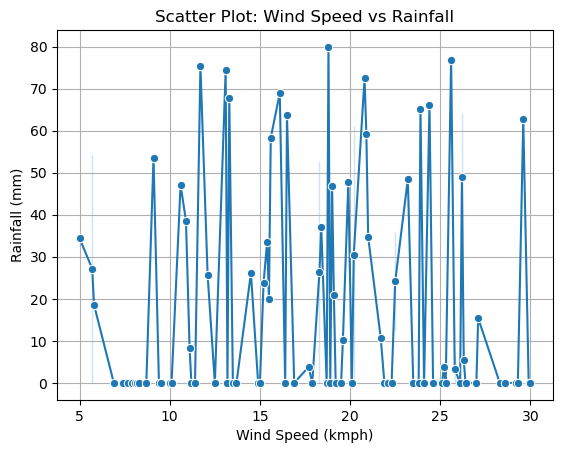

In [25]:
#Is there any correlation between wind speed and rainfall
sns.lineplot(data=df,x="Wind_Speed_kmph",y="Rainfall_mm",marker='o')
plt.title("Scatter Plot: Wind Speed vs Rainfall")
plt.xlabel("Wind Speed (kmph)")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()

In [26]:
"""🌡️ Extreme & Unusual Weather
Which days had extreme weather (temperature > 40°C or rainfall > 70mm)?

What is the maximum and minimum temperature recorded in each city?

Which cities experienced "Stormy" or "Foggy" conditions most often?

How often does each weather condition appear?

Are certain weather conditions more common in specific cities?

📈 Trend & Summary Questions
What is the trend of temperature over the month?

How does rainfall change throughout the month?

What is the most common weather condition in each city?

Which day had the highest total rainfall across all cities?

How do temperature and humidity relate to each other?

Rainfall & Weather Patterns
Create a bar chart of total rainfall per city.

Can you make a scatter plot comparing rainfall vs wind speed?

Use a heatmap to visualize the correlation between:

Temperature

Humidity

Rainfall

Wind speed

Plot a rainfall trend over time for the rainiest city.

💨 Humidity & Wind
Can you compare average humidity using a bar plot by city?

What’s the wind speed distribution across cities?

Plot multiple line graphs showing wind speed trends per city.

Create a humidity vs temperature scatter plot (color-coded by city).

"""

'🌡️ Extreme & Unusual Weather\nWhich days had extreme weather (temperature > 40°C or rainfall > 70mm)?\n\nWhat is the maximum and minimum temperature recorded in each city?\n\nWhich cities experienced "Stormy" or "Foggy" conditions most often?\n\nHow often does each weather condition appear?\n\nAre certain weather conditions more common in specific cities?\n\n📈 Trend & Summary Questions\nWhat is the trend of temperature over the month?\n\nHow does rainfall change throughout the month?\n\nWhat is the most common weather condition in each city?\n\nWhich day had the highest total rainfall across all cities?\n\nHow do temperature and humidity relate to each other?\n\nRainfall & Weather Patterns\nCreate a bar chart of total rainfall per city.\n\nCan you make a scatter plot comparing rainfall vs wind speed?\n\nUse a heatmap to visualize the correlation between:\n\nTemperature\n\nHumidity\n\nRainfall\n\nWind speed\n\nPlot a rainfall trend over time for the rainiest city.\n\n💨 Humidity & Wind\

In [27]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition'],
      dtype='object')

In [28]:
#Which days had extreme weather (temperature > 40°C or rainfall > 70mm)
df_2=df[(df["Temperature_C"]>40)|(df["Rainfall_mm"])]
df_2

,Date,City,Temperature_C,Humidity,Wind_Speed_kmph,Rainfall_mm,Weather_Condition
0,2024-07-01,Mumbai,24.5,47,11.1,8.2,Rainy
1,2024-07-02,Chennai,25.6,57,5.8,18.6,Rainy
2,2024-07-03,Chennai,27.6,71,22.5,35.9,Sunny
3,2024-07-04,Mumbai,37.7,40,22.5,12.4,Foggy
6,2024-07-07,Bangalore,38.9,69,27.1,15.4,Sunny
8,2024-07-09,Kolkata,35.4,53,9.1,53.6,Rainy
9,2024-07-10,Mumbai,35.0,40,18.4,37.0,Sunny
11,2024-07-12,Mumbai,38.5,55,11.7,75.4,Stormy
13,2024-07-14,Bangalore,26.5,77,19.0,46.8,Stormy
14,2024-07-15,Kolkata,30.5,38,17.7,3.8,Sunny


In [29]:
#What is the maximum and minimum temperature recorded in each city?
df.groupby("City")["Temperature_C"].agg(["min","max",])

,min,max
City,,
Bangalore,24.2,41.5
Chennai,24.1,41.0
Delhi,24.1,41.4
Kolkata,26.2,40.2
Mumbai,24.2,41.3


In [30]:
#Which cities experienced "Stormy" or "Foggy" conditions most often
var_3=df[(df["Weather_Condition"]=="Stormy")|(df["Weather_Condition"]=="Foggy")].groupby("City").count()
var_3


,Date,Temperature_C,Humidity,Wind_Speed_kmph,Rainfall_mm,Weather_Condition
City,,,,,,
Bangalore,4,4,4,4,4,4
Chennai,3,3,3,3,3,3
Delhi,6,6,6,6,6,6
Kolkata,6,6,6,6,6,6
Mumbai,7,7,7,7,7,7


In [31]:
#How often does each weather condition appear?
df["Weather_Condition"].value_counts()

Weather_Condition
Rainy     31
Sunny     28
Cloudy    15
Stormy    15
Foggy     11
Name: count, dtype: int64

In [32]:
#Are certain weather conditions more common in specific cities
df.groupby("City")["Weather_Condition"].value_counts()

City       Weather_Condition
Bangalore  Rainy                10
           Stormy                4
           Sunny                 4
           Cloudy                2
Chennai    Sunny                 7
           Cloudy                4
           Rainy                 4
           Stormy                2
           Foggy                 1
Delhi      Cloudy                6
           Sunny                 5
           Foggy                 3
           Rainy                 3
           Stormy                3
Kolkata    Sunny                 7
           Rainy                 5
           Foggy                 3
           Stormy                3
           Cloudy                1
Mumbai     Rainy                 9
           Sunny                 5
           Foggy                 4
           Stormy                3
           Cloudy                2
Name: count, dtype: int64

In [33]:
from datetime import date
df["Date"]=pd.to_datetime(df["Date"])


In [34]:
df["Month"] = df["Date"].dt.month_name

In [35]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

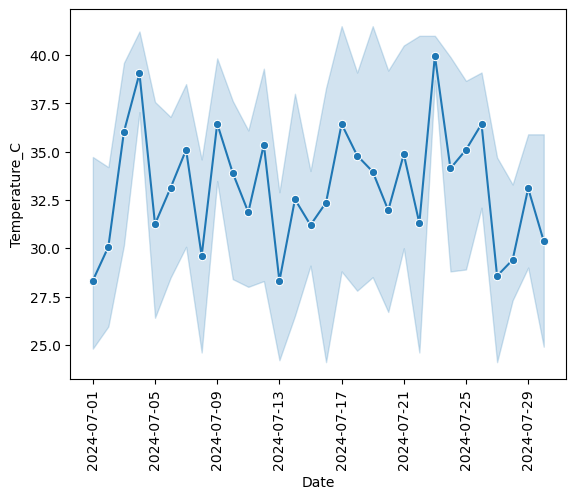

In [36]:
#What is the trend of temperature over the month
sns.lineplot(data=df,x="Date",y="Temperature_C",marker='o')
plt.xticks(rotation=90)
plt.show()

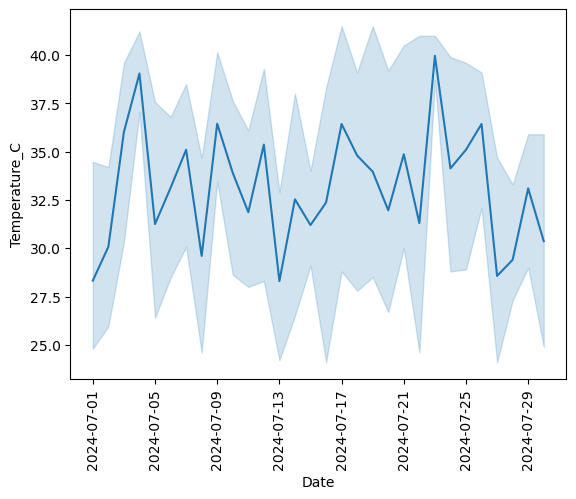

In [37]:
#How does rainfall change throughout the month?
sns.lineplot(data=df,x="Date",y="Temperature_C")
plt.xticks(rotation=90)
plt.show()

In [38]:
#What is the most common weather condition in each city?
vr_1=df.groupby("City")["Weather_Condition"].value_counts().sort_values(ascending=False)
vr_1

City       Weather_Condition
Bangalore  Rainy                10
Mumbai     Rainy                 9
Chennai    Sunny                 7
Kolkata    Sunny                 7
Delhi      Cloudy                6
Mumbai     Sunny                 5
Delhi      Sunny                 5
Kolkata    Rainy                 5
Bangalore  Sunny                 4
Chennai    Cloudy                4
           Rainy                 4
Mumbai     Foggy                 4
Bangalore  Stormy                4
Kolkata    Foggy                 3
Mumbai     Stormy                3
Kolkata    Stormy                3
Delhi      Rainy                 3
           Stormy                3
           Foggy                 3
Chennai    Stormy                2
Bangalore  Cloudy                2
Mumbai     Cloudy                2
Kolkata    Cloudy                1
Chennai    Foggy                 1
Name: count, dtype: int64

In [39]:
#Which day had the highest total rainfall across all cities?
df[df["Weather_Condition"]=="Rainy"].groupby("City")["Rainfall_mm"].sum().sort_values(ascending=False)

City
Mumbai       327.1
Bangalore    197.9
Chennai       84.7
Kolkata       79.7
Delhi          0.0
Name: Rainfall_mm, dtype: float64

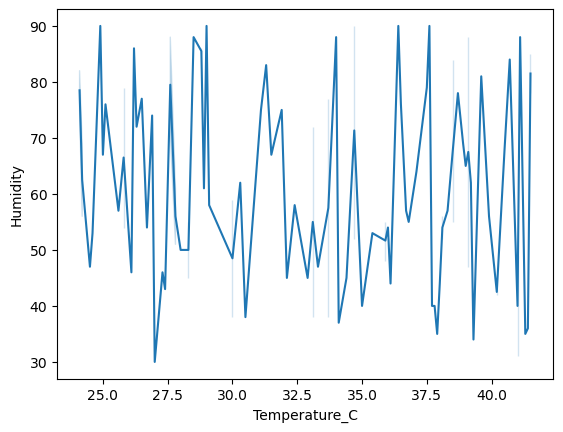

In [40]:
#How do temperature and humidity relate to each other
sns.lineplot(data=df,x="Temperature_C",y="Humidity")
plt.show()

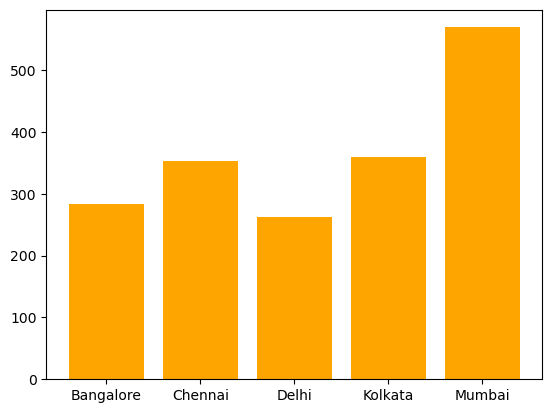

In [41]:
#Create a bar chart of total rainfall per city
rain_c=df.groupby("City")["Rainfall_mm"].sum().sort_index()
plt.bar(rain_c.index,rain_c.values,color="orange")
plt.show()

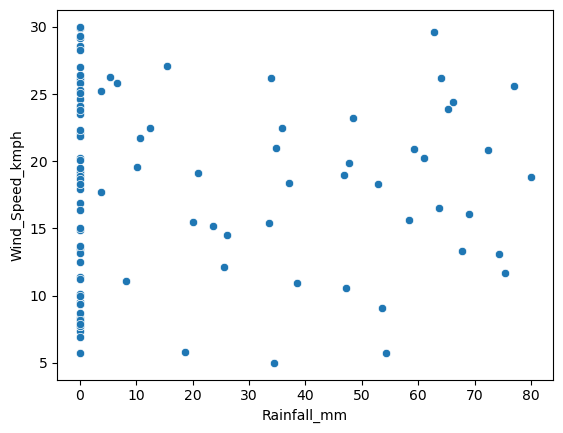

In [42]:
#Can you make a scatter plot comparing rainfall vs wind speed
sns.scatterplot(data=df,x="Rainfall_mm",y="Wind_Speed_kmph")
plt.show()

In [43]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

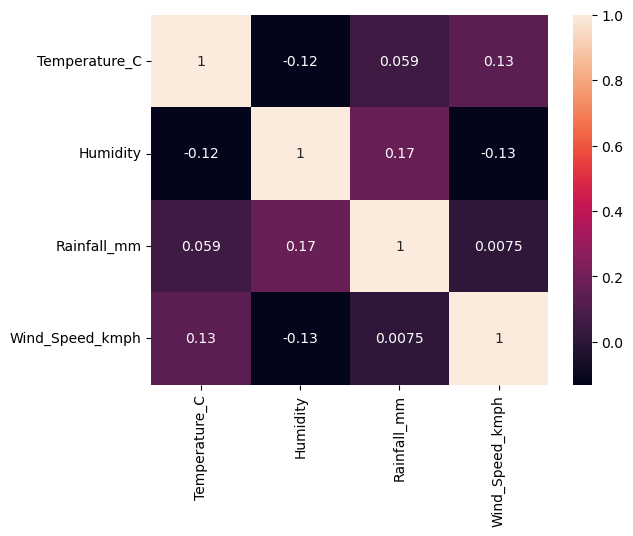

In [44]:
#Use a heatmap to visualize the correlation between:
#Temperature#HumidityRainfallWind speed
heat_m=df[["Temperature_C","Humidity","Rainfall_mm","Wind_Speed_kmph"]].corr()
sns.heatmap(heat_m,annot=True)
plt.show()

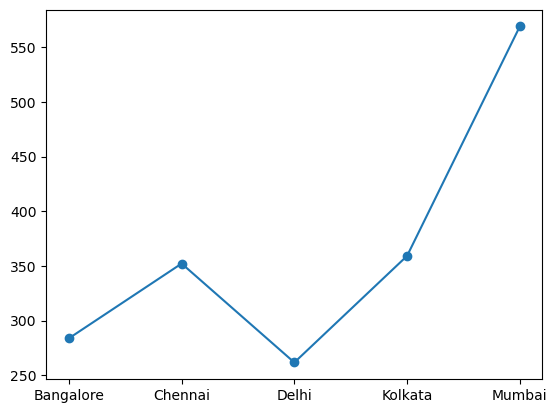

In [45]:
#Plot a rainfall trend over time for the rainiest city
plot_g=df.groupby("City")["Rainfall_mm"].sum().sort_index()
plt.plot(plot_g.index,plot_g.values,marker='o')
plt.show()

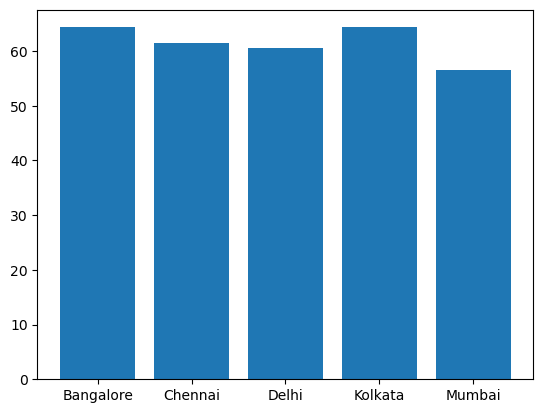

In [46]:
#Can you compare average humidity using a bar plot by city
bar_h=df.groupby("City")["Humidity"].mean().sort_index()
plt.bar(bar_h.index,bar_h.values)
plt.show()

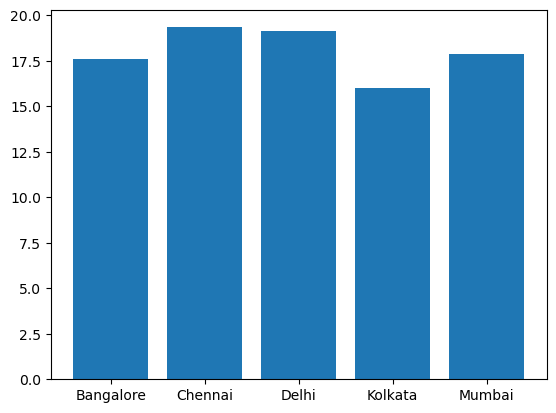

In [47]:
#What’s the wind speed distribution across cities
bar_w=df.groupby("City")["Wind_Speed_kmph"].mean().sort_index()
plt.bar(bar_w.index,bar_w.values)
plt.show()

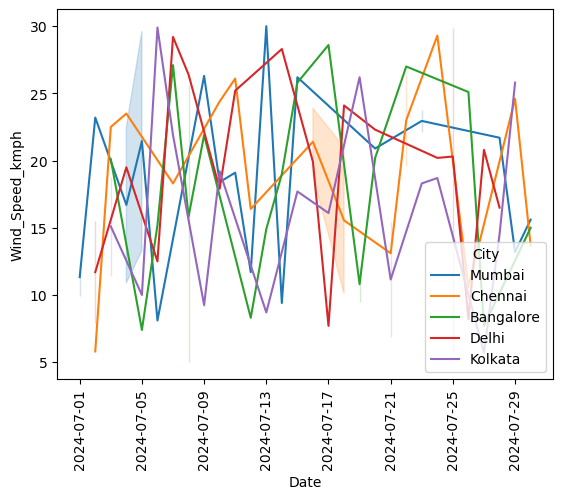

In [48]:
#Plot multiple line graphs showing wind speed trends per city.
sns.lineplot(data=df,x="Date",y="Wind_Speed_kmph",hue="City")
plt.xticks(rotation=90)
plt.show()

In [49]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

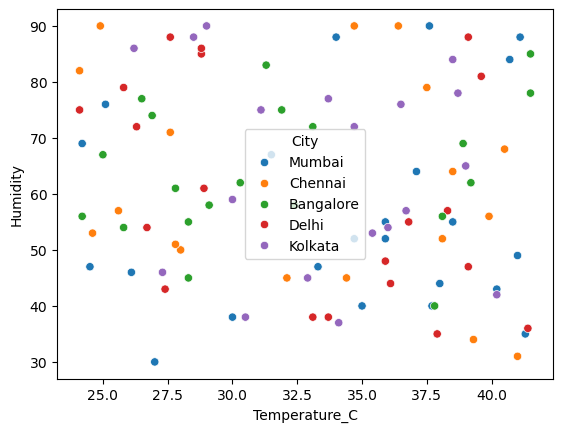

In [50]:
#Create a humidity vs temperature scatter plot (color-coded by city)
sns.scatterplot(data=df,x="Temperature_C",y="Humidity",hue="City")
plt.show()

In [51]:
"""☁️ WordCloud Questions
Based on the Weather_Condition column:
Create a word cloud of the most frequent weather conditions.

Generate separate city-wise weather condition word clouds.

Make a word cloud of weather conditions only on rainy days.

What are the top words appearing in foggy or stormy weather days?

📅 Time-Based Visual Questions
How does the average temperature change over the month? (line chart)

Show a stacked area chart of weather conditions over time.

Create a bar chart comparing the number of days for each weather condition.

Use a heatmap (pivoted) to show daily temperature by city and date."""

'☁️ WordCloud Questions\nBased on the Weather_Condition column:\nCreate a word cloud of the most frequent weather conditions.\n\nGenerate separate city-wise weather condition word clouds.\n\nMake a word cloud of weather conditions only on rainy days.\n\nWhat are the top words appearing in foggy or stormy weather days?\n\n📅 Time-Based Visual Questions\nHow does the average temperature change over the month? (line chart)\n\nShow a stacked area chart of weather conditions over time.\n\nCreate a bar chart comparing the number of days for each weather condition.\n\nUse a heatmap (pivoted) to show daily temperature by city and date.'

In [52]:
from wordcloud import WordCloud,STOPWORDS

In [53]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [54]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

(-0.5, 799.5, 399.5, -0.5)

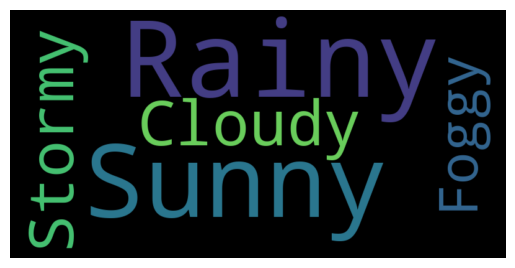

In [55]:
#Create a word cloud of the most frequent weather conditions
tot_weat=' '.join(df["Weather_Condition"].dropna().astype(str))
wordcloud=WordCloud( width=800,
    height=400,
    background_color='black',stopwords=set(STOPWORDS)).generate(tot_weat)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

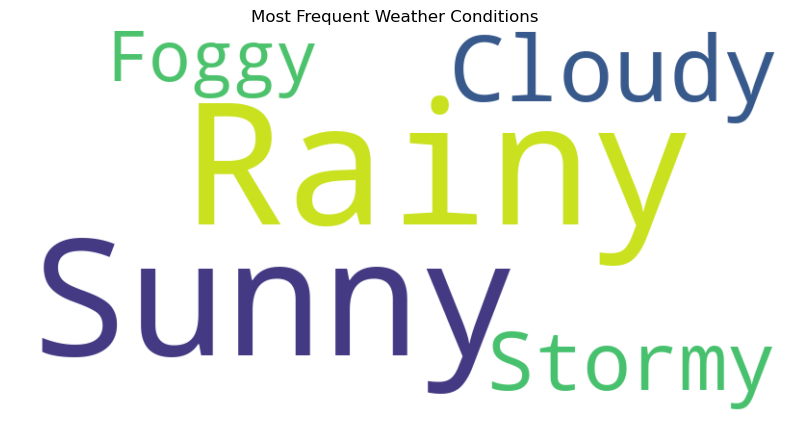

In [56]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all weather descriptions into a single string (with spaces)
tot_weat = ' '.join(df["Weather_Condition"].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=set(STOPWORDS)
).generate(tot_weat)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Weather Conditions")
plt.show()


In [57]:
df["City"].unique()

array(['Mumbai', 'Chennai', 'Bangalore', 'Delhi', 'Kolkata'], dtype=object)

In [58]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

(-0.5, 399.5, 199.5, -0.5)

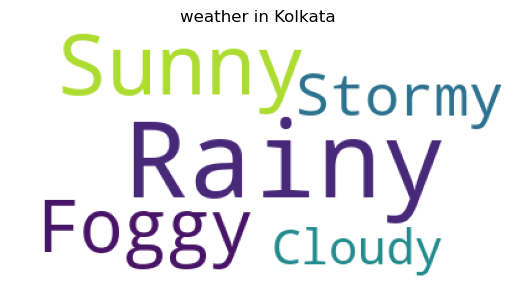

In [59]:
#Generate separate city-wise weather condition word clouds.
filter_1=df[df["City"]=="Mumbai"]
tot_wor=' '.join(filter_1["Weather_Condition"])
wordcloud1=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(tot_wor)
plt.title("weather in Mumbai")
plt.imshow(wordcloud1)
plt.axis('off')
#2filter
filter_2=df[df["City"]=="Chennai"]
tot_wor=' '.join(filter_1["Weather_Condition"])
wordcloud2=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(tot_wor)
plt.title("weather in Chennai")
plt.imshow(wordcloud2)
plt.axis('off')
#3filter
filter_3=df[df["City"]=="Bangalore"]
tot_wor=' '.join(filter_1["Weather_Condition"])
wordcloud3=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(tot_wor)
plt.title("weather in Bangalore")
plt.imshow(wordcloud3)
plt.axis('off')
#4filter
filter_4=df[df["City"]=="Delhi"]
tot_wor=' '.join(filter_1["Weather_Condition"])
wordcloud4=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(tot_wor)
plt.title("weather in Delhi")
plt.imshow(wordcloud4)
plt.axis('off')
#5filter
filter_5=df[df["City"]=="Kolkata"]
tot_wor=' '.join(filter_1["Weather_Condition"])
wordcloud5=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(tot_wor)
plt.title("weather in Kolkata")
plt.imshow(wordcloud1)
plt.imshow(wordcloud2)
plt.imshow(wordcloud3)
plt.imshow(wordcloud4)
plt.imshow(wordcloud5)
plt.axis('off')


In [60]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

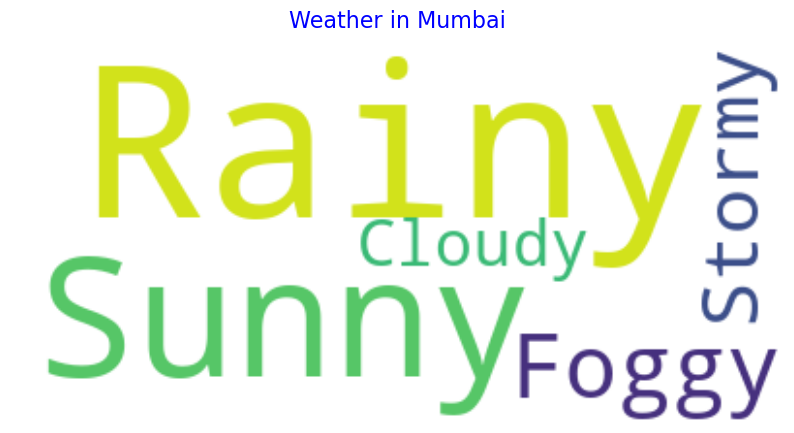

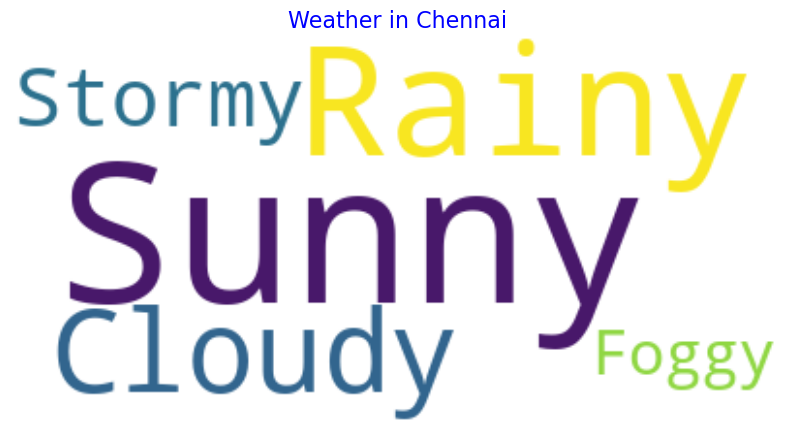

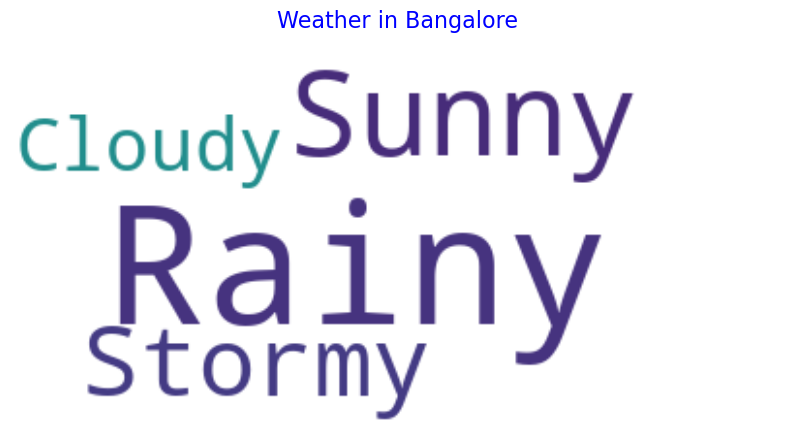

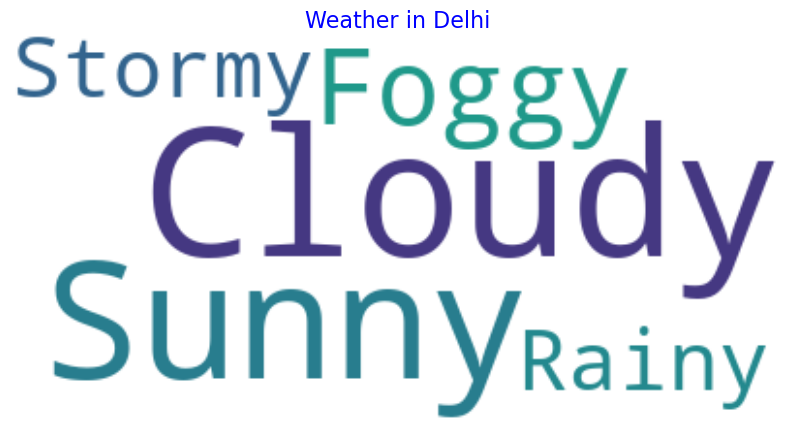

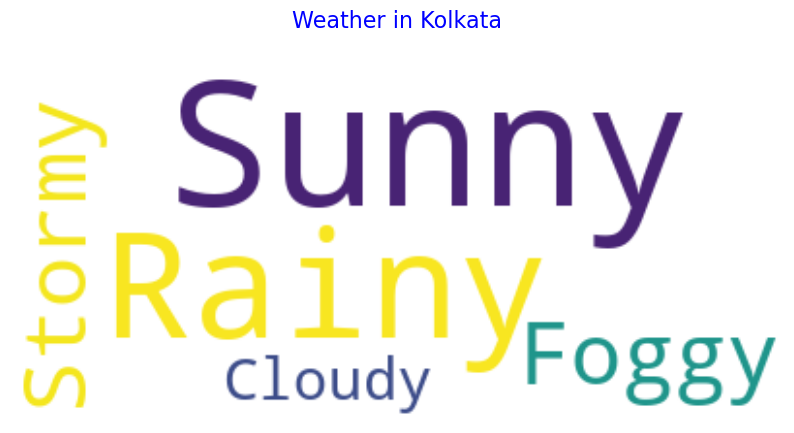

In [68]:
#Generate separate city-wise weather condition word clouds
cities=df["City"].unique()
for cit_y in cities:
    total_city=df[df["City"]==cit_y]
    total_weat=' '.join(total_city["Weather_Condition"].astype(str))
    wordcloud=WordCloud(background_color="White",stopwords=set(STOPWORDS)).generate(total_weat)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Weather in {cit_y}",fontsize=16,color="blue")
    

In [71]:
var_a="my name is mehak"
print(f"my self {var_a}")

my self my name is mehak


(-0.5, 399.5, 199.5, -0.5)

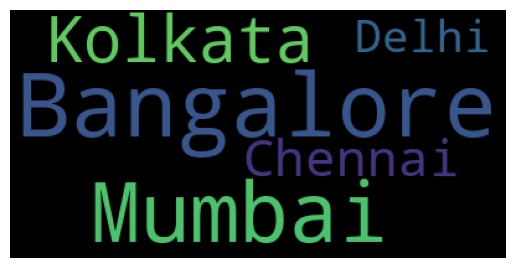

In [76]:
#Make a word cloud of weather conditions only on rainy days.
city_n=df[df["Weather_Condition"]=="Rainy"]
tot_city=' '.join(city_n["City"])
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(tot_city)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

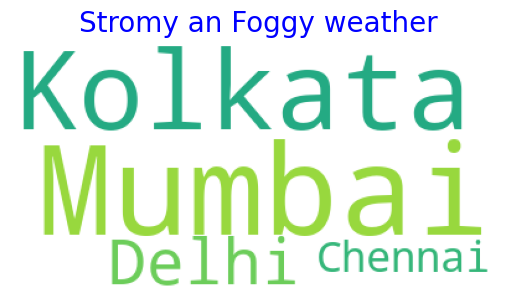

In [82]:
#What are the top words appearing in foggy or stormy weather days?
city_n=df[(df["Weather_Condition"]=="Foggy")|(df["Weather_Condition"]=="Stromy")]
tot_city=' '.join(city_n["City"])
wordcloud=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(tot_city)
plt.imshow(wordcloud)
plt.title("Stromy an Foggy weather",fontsize=20,color="blue")
plt.axis('off')

In [83]:
"""📅 Time-Based Visual Questions
How does the average temperature change over the month? (line chart)

Show a stacked area chart of weather conditions over time.

Create a bar chart comparing the number of days for each weather condition.

Use a heatmap (pivoted) to show daily temperature by city and date."""

'📅 Time-Based Visual Questions\nHow does the average temperature change over the month? (line chart)\n\nShow a stacked area chart of weather conditions over time.\n\nCreate a bar chart comparing the number of days for each weather condition.\n\nUse a heatmap (pivoted) to show daily temperature by city and date.'

In [84]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

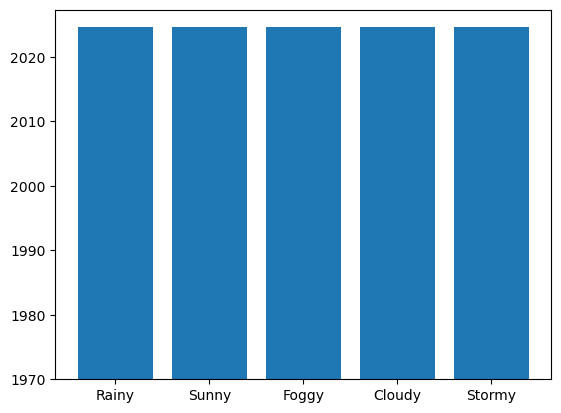

In [85]:
#Show a stacked area chart of weather conditions over time
plt.bar(df["Weather_Condition"],df["Date"])
plt.show()

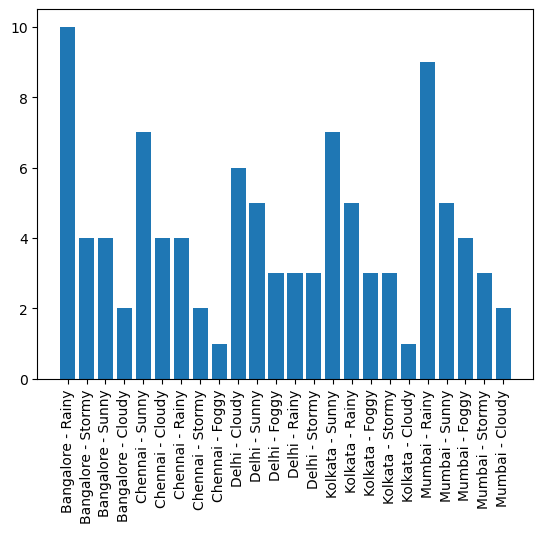

In [96]:
#Create a bar chart comparing the number of days for each weather condition
date_f=df.groupby("City")["Weather_Condition"].value_counts().reset_index(name="count")
date_f["Label"] = date_f["City"] + " - " + date_f["Weather_Condition"]
plt.bar(date_f["Label"],date_f["count"])
plt.xticks(rotation=90)
plt.show()

In [97]:
df.columns

Index(['Date', 'City', 'Temperature_C', 'Humidity', 'Wind_Speed_kmph',
       'Rainfall_mm', 'Weather_Condition', 'Month'],
      dtype='object')

In [98]:
#Use a heatmap (pivoted) to show daily temperature by city and date
corr_df=df[["Date","Temperature_C","Rainfall_mm","Humidity","Wind_Speed_kmph"]].corr()

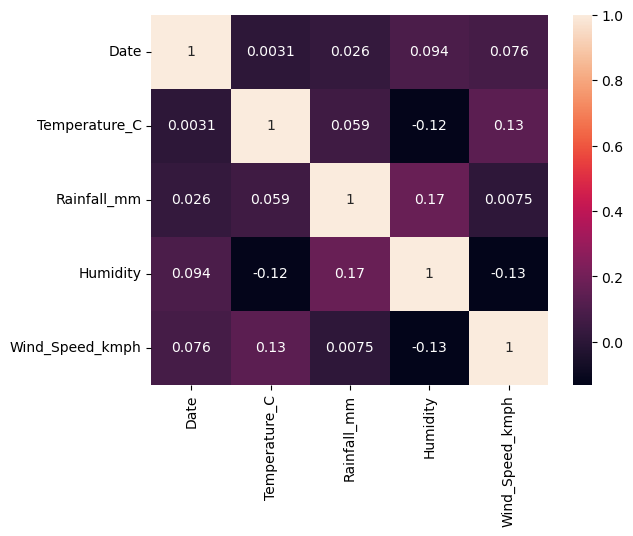

In [99]:
sns.heatmap(corr_df,annot=True)
plt.show()